In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"D:\excelr assignments\reccommendation sys\book.csv",encoding='latin-1')

In [3]:
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [4]:
df.rename(columns={'User.ID':'userid','Book.Title':'title','Book.Rating':'ratings'},inplace=True)

In [5]:
df.drop(columns='Unnamed: 0',inplace=True,axis=1)

<AxesSubplot:>

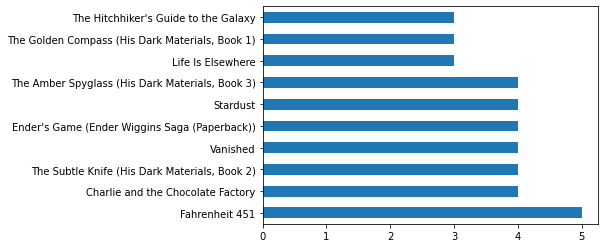

In [6]:
a = df['title'].value_counts()[:10]
a.plot(kind='barh')

In [7]:
#From the above plot Fahrenhit 451 is the most common book read followed by Charlie and Chocolate factory,vanished and others

<AxesSubplot:>

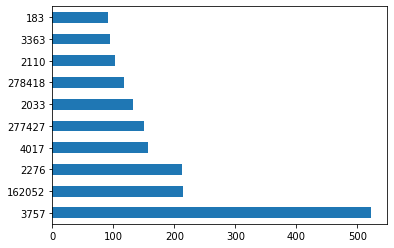

In [8]:
df['userid'].value_counts()[:10].plot(kind='barh')

In [9]:
# User with userid 3757 has read more than 500 books followed by user with userid 162052 and 2276 who have read 200 books

In [10]:
df1 = pd.DataFrame(df.groupby(['title'])['ratings'].mean())

<AxesSubplot:ylabel='title'>

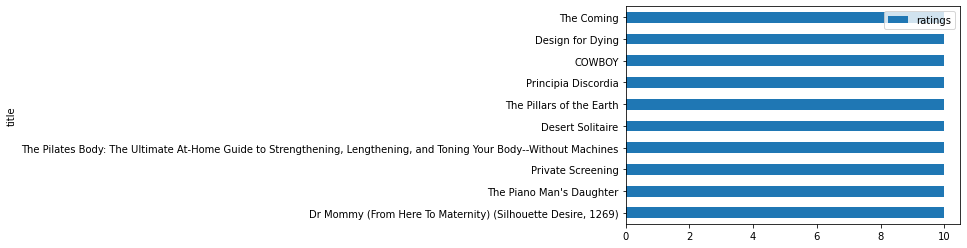

In [11]:
df1.sort_values(['ratings'],ascending=False)[:10].plot(kind='barh')

In [12]:
# Above are the movies which have the top average ratings  by the users

In [13]:
df.head(2)

,userid,title,ratings
0,276726,Classical Mythology,5
1,276729,Clara Callan,3


In [14]:
rating_matrix = df.pivot_table(index='userid', columns='title', values='ratings')
rating_matrix = rating_matrix.fillna(0)

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
def similarity(userid,rating_matrix):
    user = rating_matrix[rating_matrix.index==userid]
    others = rating_matrix[rating_matrix.index!=userid]
    cos_sim = cosine_similarity(user,others)[0].tolist()
    idx = others.index.to_list()
    idx_sim = dict(zip(idx, cos_sim))
    idx_sim_sorted = sorted(idx_sim.items(), key=lambda x: x[1])
    idx_sim_sorted.reverse()
    top_user_similarities = idx_sim_sorted
    users = [i[0] for i in top_user_similarities]
    return users

In [17]:
def recommend_book(user_index, similar_user_indices, r_matrix,items=10):
    similar_users = r_matrix[r_matrix.index.isin(similar_user_indices)]
    similar_users = similar_users.mean(axis=0)
    similar_df = pd.DataFrame(similar_users, columns=['mean'])
    user_df = r_matrix[r_matrix.index == user_index]
    user_df_transposed = user_df.transpose()
    user_df_transposed.columns = ['rating']
    user_df_transposed = user_df_transposed[user_df_transposed['rating'] == 0]
    books_unseen = user_df_transposed.index.tolist()
    similar_users_filtered = similar_df[similar_df.index.isin(books_unseen)]
    similar_users_ordered = similar_df.sort_values(by=['mean'], ascending=False)

    top_books = similar_users_ordered.head(items)
    top_books_indices = top_books.index.tolist()
    #book_title = df[df['userid'].isin(top_books_indices)]['title']
    

    return top_books_indices

In [40]:
df['userid'][:1000]

0      276726
1      276729
2      276729
3      276736
4      276737
        ...  
995    277585
996    277585
997    277585
998    277586
999    277588
Name: userid, Length: 1000, dtype: int64

In [19]:
s = similarity(162121,rating_matrix)

In [20]:
recommend_book(162121,s,rating_matrix)

['The Subtle Knife (His Dark Materials, Book 2)',
 'Fahrenheit 451',
 'Stardust',
 'The Amber Spyglass (His Dark Materials, Book 3)',
 'The Face',
 'Vanished',
 'Charlie and the Chocolate Factory',
 'The Neverending Story',
 'The Testament',
 'The Golden Compass (His Dark Materials, Book 1)']